# ASSESSING CUSTOMER RETENTION IN E-COMMERCE INDUSTRY

## BUSINESS UNDERSTANDING

##### OVERVIEW

Customer retention is a critical aspect of the e-commerce industry. In a highly competitive market, retaining existing customers is often more cost-effective than acquiring new ones. Companies need to understand customer behaviors, preferences, and buying patterns to minimize churn and foster loyalty. Customer retention analysis helps identify at-risk customers, improve marketing strategies, and enhance customer experience.

E-commerce businesses face several challenges related to customer retention:

- High Customer Churn Rates
- Lack of Insights
- Increasing Acquisition Costs
- Personalization Challenges
- Market Saturation


### ANALYTICAL QUESTIONS


- Who are the most valuable customers?

- What is the average order size (in terms of quantity) per customer?

- What is the frequency of repeat purchases across customers?

- What are the top-performing products in terms of sales quantity and revenue? Which product categories (based on Description) have the highest revenue and sales quantity?

- What is the revenue trend over time (daily, weekly, or monthly)?

- How does customer behavior differ on weekdays vs. weekends?

- What is the average unit price for each product?

- Which countries generate the highest average revenue per order?

- Which countries have the highest concentration of unique customers?


### HYPOTHESIS

1. Null Hypothesis (H₀): The average spending of customers from Mozambique is equal to that of customers from other countries.
Alternate Hypothesis (H₁): The average spending of customers from Mozambique is higher than that of customers from other countries.

2. Null Hypothesis (H₀): Lower unit prices do not significantly increase the quantity sold.
Alternate Hypothesis (H₁): Lower unit prices significantly increase the quantity sold.






## DATA UNDERSTANDING

In [596]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro


In [597]:
# Loading our dataset
Commerce_df =pd.read_csv('../Dataset/Dataset_ecommerce.csv')

In [598]:
# retrieving the first 5 rows
Commerce_df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [599]:
# columns for the dataset
Commerce_df.columns

Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'StockCode', 'Description',
       'Quantity', 'UnitPrice', 'Country'],
      dtype='object')

In [600]:
# size of the dataframe
Commerce_df.shape

(541909, 8)

In [601]:
# Information of the dataframe
Commerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [602]:
# Checking missing values
Commerce_df.isna().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [603]:
# Checking for duplicates
Commerce_df.duplicated().sum()

np.int64(0)

In [604]:
# Retrieving unique values for dataframe
for column in Commerce_df:
        print(f"Column Name : {column}")
        print(Commerce_df[column].unique())
        print("-----------------------------")

Column Name : InvoiceNo
['536365' '536366' '536367' ... '581585' '581586' '581587']
-----------------------------
Column Name : InvoiceDate
['2010-12-01 08:26:00' '2010-12-01 08:28:00' '2010-12-01 08:34:00' ...
 '2011-12-09 12:31:00' '2011-12-09 12:49:00' '2011-12-09 12:50:00']
-----------------------------
Column Name : CustomerID
[17850. 13047. 12583. ... 13298. 14569. 12713.]
-----------------------------
Column Name : StockCode
['SC1734' 'SC2088' 'SC3463' ... 'SC2588' 'SC7252' 'SC5313']
-----------------------------
Column Name : Description
['Electronics' 'Furniture' 'Books' 'Toys' 'Kitchenware' 'Cosmetics'
 'Sports Equipment' 'Shoes' 'Cloths' 'Jewelry']
-----------------------------
Column Name : Quantity
[ 65  95  78  15  50  41  44  47  19  55  89  58   3   2  64  99  75  26
  69  56   7  10  62  23  42  43  91  45  92  30  71  84  39  88   6  54
  32  70  68  38  18  63  22  13  98  85  82  67  11  86  59  29   8  83
   4  31  34   5  61  36  87  94  90  52  73  57  74  97   9

In [605]:
# retrieve customer id  missing values and other values in variables
Commerce_df[Commerce_df['CustomerID'].isna()]

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
622,536414,2010-12-01 11:52:00,NaN,SC7308,Kitchenware,93,62.55,Senegal
1443,536544,2010-12-01 14:32:00,NaN,SC3127,Toys,86,22.90,Burkina Faso
1444,536544,2010-12-01 14:32:00,NaN,SC3641,Kitchenware,7,72.45,Nigeria
1445,536544,2010-12-01 14:32:00,NaN,SC5252,Cosmetics,39,32.46,Ghana
1446,536544,2010-12-01 14:32:00,NaN,SC1375,Toys,39,3.12,South Africa
...,...,...,...,...,...,...,...,...
541536,581498,2011-12-09 10:26:00,NaN,SC9154,Toys,7,15.07,Libya
541537,581498,2011-12-09 10:26:00,NaN,SC8504,Cloths,35,43.48,Ethiopia
541538,581498,2011-12-09 10:26:00,NaN,SC5771,Electronics,82,88.05,Morocco
541539,581498,2011-12-09 10:26:00,NaN,SC7557,Kitchenware,75,91.56,Togo


In [606]:
# dropping missing values
Commerce_df = Commerce_df.dropna(subset=['CustomerID'])


In [607]:
# checking missing values 
Commerce_df.isna().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [608]:
# converting invoice date to datetime datatype
Commerce_df['InvoiceDate'] = pd.to_datetime(Commerce_df['InvoiceDate']).dt.date

In [609]:
Commerce_df['InvoiceDate'] = pd.to_datetime(Commerce_df['InvoiceDate'])

In [610]:
Commerce_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


## EXPLORATORY DATA ANALYSIS

In [611]:
# Description statistics
Commerce_df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
InvoiceNo,406829,22190,576339,542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvoiceDate,406829,NaN,NaN,NaN,2011-07-10 03:16:19.124890624,2010-12-01 00:00:00,2011-04-06 00:00:00,2011-07-31 00:00:00,2011-10-20 00:00:00,2011-12-09 00:00:00,NaN
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303
StockCode,406829,9000,SC2014,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,406829,10,Jewelry,41017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,406829.0,NaN,NaN,NaN,50.478471,1.0,25.0,50.0,75.0,100.0,28.872921
UnitPrice,406829.0,NaN,NaN,NaN,50.477654,1.0,25.71,50.43,75.17,100.0,28.573075
Country,406829,28,Nigeria,14714,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## KEY INSIGHTS AND OBSERVATIONS

- I observed that the highest number of items were purchased on December 5th, 2011.

- I observed that we have 10 product categories, sports equipment was the most frequently purchased category.

- I observed that the average unit price of items was $50.47, with prices ranging from $1 to $100.

- I observed that we have 28 countries that purchased, Côte d'Ivoire recorded the highest number of purchases among all countries.

- I observed that the average quantity purchased per transaction was 50.52 units.

#### UNIVARIATE ANALYSIS

In [612]:
# retrieving columns with numerical data types
num_cols=Commerce_df.select_dtypes(include='number')
num_cols= num_cols.drop(columns= 'CustomerID')
num_cols.columns

Index(['Quantity', 'UnitPrice'], dtype='object')

In [613]:
# Dropping specified columns
Commerce_dff = Commerce_df.drop(columns=['InvoiceNo', 'InvoiceDate', 'CustomerID', 'StockCode'])

# Retrieving columns with object data types
cat_cols = Commerce_dff.select_dtypes(include='object')

# Displaying the columns
print(cat_cols.columns)

Index(['Description', 'Country'], dtype='object')


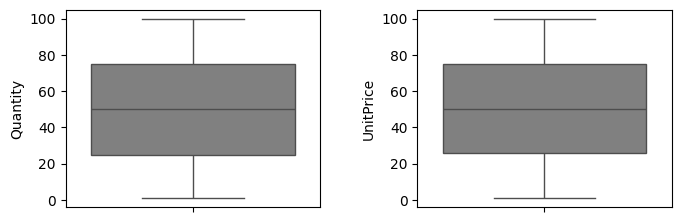

In [614]:

# plotting box plot for numerical data
plt.figure(figsize=(18, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(6,5, i + 1)
    sns.boxplot(Commerce_df, y=Commerce_df[variable], color='gray')
    plt.tight_layout(pad=3),
    plt.xticks(rotation=45)
plt.show()

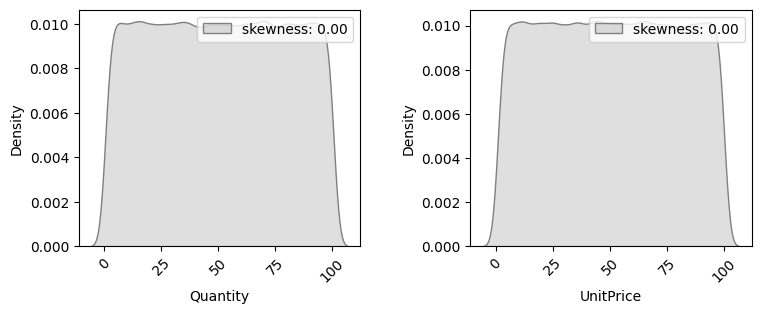

In [615]:
# Plot a Kernel density plot for the variables

plt.figure(figsize=(20, 20))

for i, variable in enumerate(num_cols):
    plt.subplot(6,5, i + 1)
    sns.kdeplot(Commerce_df,x=Commerce_df[variable],label= 'skewness: %.2f'%(Commerce_df[variable].skew()), fill = True,color= 'gray')
    plt.tight_layout(pad=3)
    plt.legend(loc = 'upper right')
    plt.xticks(rotation=45)

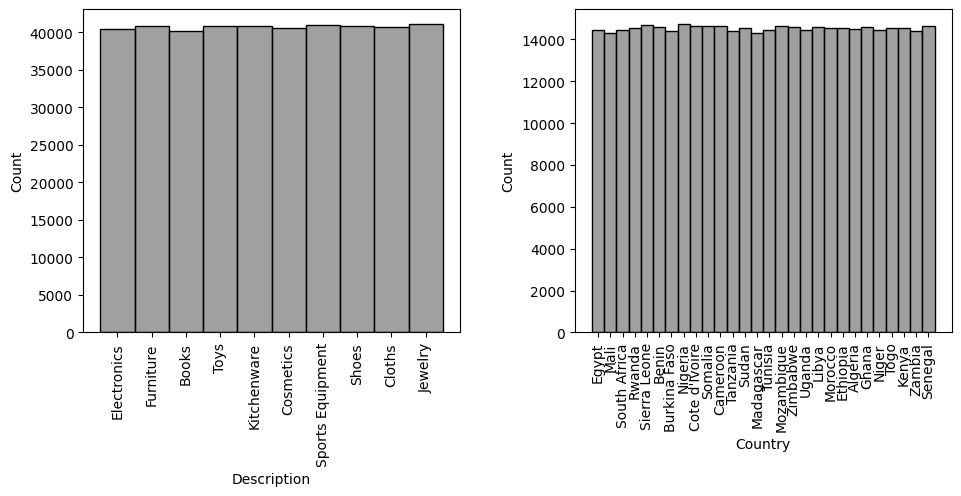

In [616]:
# Plot a histogram plot for the variables
plt.figure(figsize=(25, 30))

for i, variable in enumerate(cat_cols):
    plt.subplot(6,5, i + 1)
    sns.histplot(cat_cols,x=cat_cols[variable], color= 'gray')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=90)

#### OBSERVATION
- We noticed that there are no outliers detected in the distribution of quantity and unit price.

- Both quantity and unit price distributions appear symmetrical and bell-shaped, indicating they are approximately normally distributed.

- Côte d’Ivoire recorded the highest number of items purchased, followed by Sierra Leone and Benin, while Mali had the lowest purchase count.

- we also noticed that Sports equipment emerged as the most purchased category, followed by the jewelry section, with the books section having the fewest purchases.

#### BIVARIATE ANALYSIS

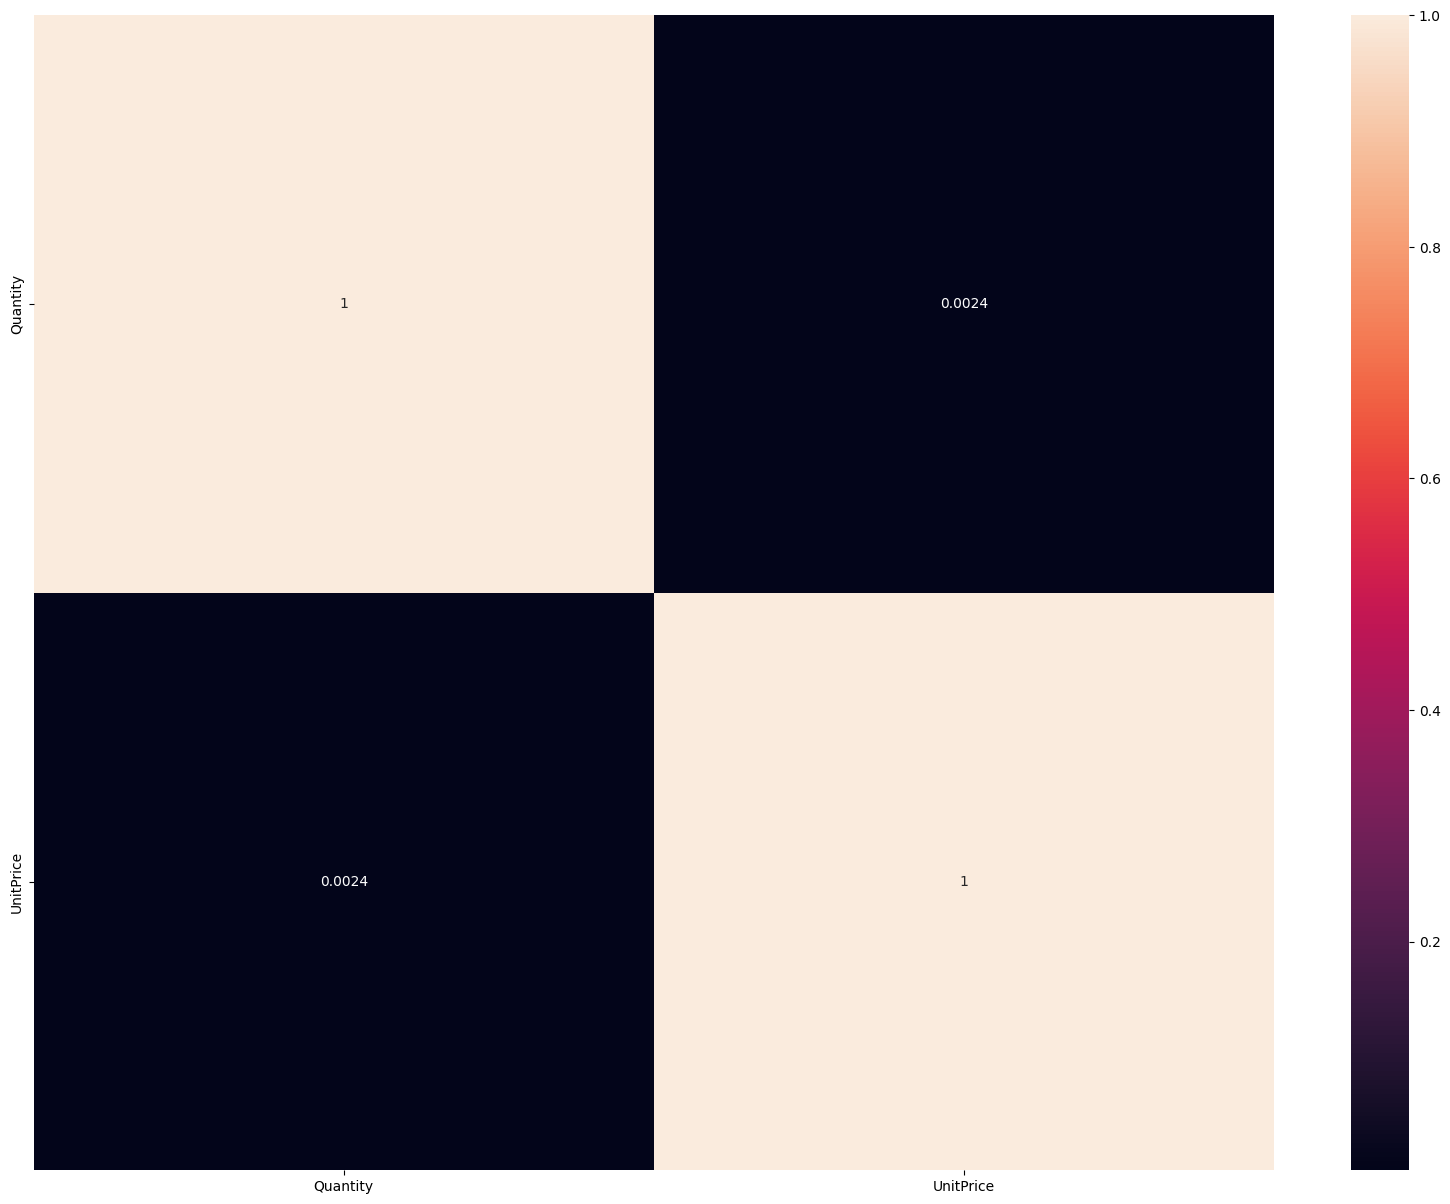

In [617]:
# plotting heatmap for correlatiuon between each variable
plt.figure(figsize=(20, 15))
sns.heatmap(data=num_cols.corr(), annot=True,color=['skyblue','brown'])
plt.show()

#### OBSERVATION
- We observed a positive correlation between quantity and unit price; however, the relationship is not strong.


## ANALYTICAL QUESTIONS

1. Who are the most valuable customers?

In [618]:
Commerce_df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda


In [619]:
customer_counts = Commerce_df['CustomerID'].value_counts().reset_index().head()
customer_counts

,CustomerID,count
0,17841.0,7983
1,14911.0,5903
2,14096.0,5128
3,12748.0,4642
4,14606.0,2782


In [620]:
top_customer_ids = customer_counts['CustomerID']  
top_customer_ids

0    17841.0
1    14911.0
2    14096.0
3    12748.0
4    14606.0
Name: CustomerID, dtype: float64

In [621]:
# Filter the main DataFrame for rows with these CustomerIDs
top_customer_rows = Commerce_df[Commerce_df['CustomerID'].isin(top_customer_ids)]
top_customer_rows


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
1016,536521,2010-12-01,12748.0,SC3647,Shoes,69,7.16,Cote d'Ivoire
1404,536540,2010-12-01,14911.0,SC3470,Toys,57,89.17,Ethiopia
1405,536540,2010-12-01,14911.0,SC1899,Books,74,8.90,Burkina Faso
1406,536540,2010-12-01,14911.0,SC7913,Toys,21,55.41,Morocco
1407,536540,2010-12-01,14911.0,SC2834,Cloths,82,28.63,Algeria
...,...,...,...,...,...,...,...,...
541855,581580,2011-12-09,12748.0,SC6035,Books,66,37.62,Tanzania
541856,581580,2011-12-09,12748.0,SC6677,Cosmetics,62,60.96,Egypt
541857,581580,2011-12-09,12748.0,SC9943,Electronics,51,8.02,Nigeria
541858,581580,2011-12-09,12748.0,SC5614,Kitchenware,76,44.16,Madagascar


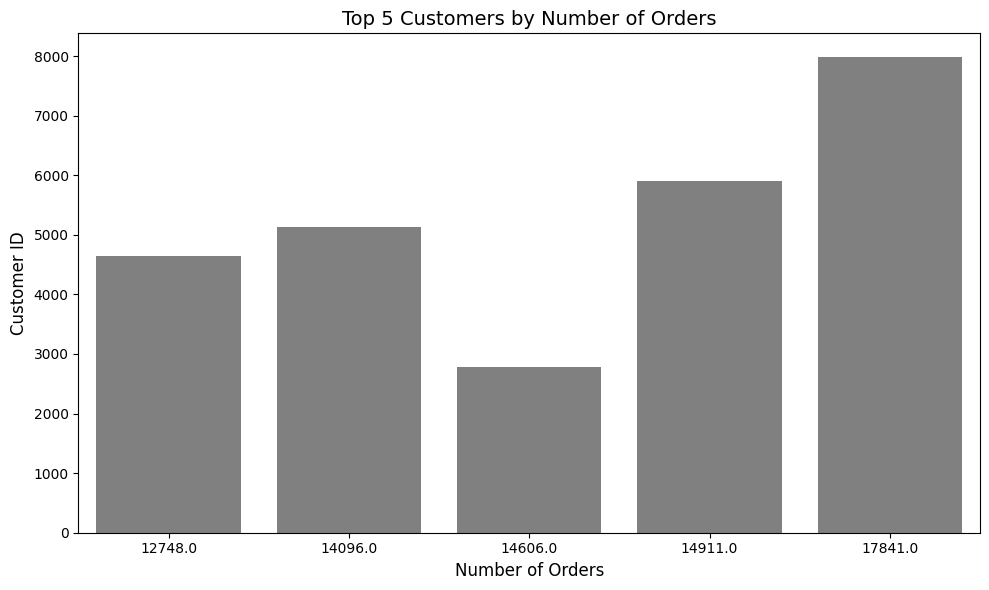

In [622]:

# Horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data = customer_counts, y= 'count', x= 'CustomerID', color= 'gray')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.title('Top 5 Customers by Number of Orders', fontsize=14)
plt.tight_layout()

plt.show()

We identified our most valuable customers based on customer retention as those with the highest number of orders. These customers are identified by the following IDs: 17841.0, 14911.0, 14096.0, 12748.0, and 14606.0. Among them, Customer ID 17841 stands out as our most loyal customer, having placed the highest number of orders, totaling 7983.

2. What is the average order size (in terms of quantity) per customer?

In [623]:
avg_cust_order = Commerce_df.groupby('CustomerID')['Quantity'].mean().reset_index().head()
avg_cust_order

,CustomerID,Quantity
0,12346.0,59.500000
1,12347.0,46.763736
2,12348.0,49.645161
3,12349.0,47.041096
4,12350.0,53.941176


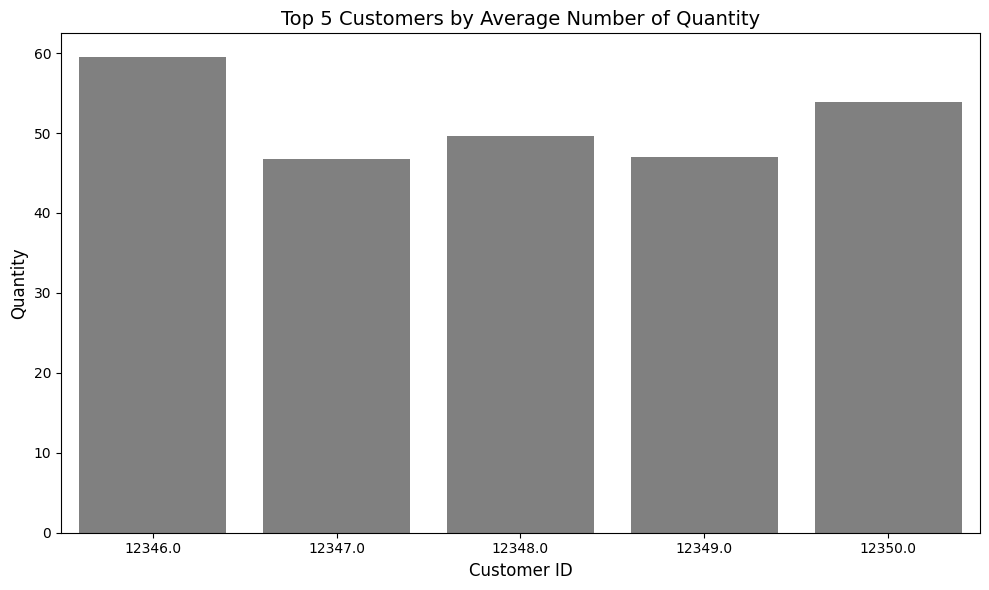

In [624]:

# Horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data = avg_cust_order, x= 'CustomerID', y= 'Quantity', color= 'gray')
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('Top 5 Customers by Average Number of Quantity', fontsize=14)
plt.tight_layout()

plt.show()

We observed that our top 5 customers with the highest average order quantities are those with IDs 12346, 12347, 12348, 12349, and 12350. Among them, Customer ID 12346 stands out for ordering the highest quantity, with an average of 59.5 items per order.

3. What is the frequency of repeat purchases across customers?

In [625]:
Commerce_df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda


In [626]:
#Group by CustomerID and Description to count purchases
repeat_purchases = Commerce_df.groupby(['CustomerID', 'Description']).size().reset_index(name='Purchase_Count')

In [627]:
repeat_purchases = repeat_purchases[repeat_purchases['Purchase_Count'] > 1]
repeat_purchases

,CustomerID,Description,Purchase_Count
0,12346.0,Shoes,2
1,12347.0,Books,14
2,12347.0,Cloths,14
3,12347.0,Cosmetics,20
4,12347.0,Electronics,28
...,...,...,...
38049,18287.0,Furniture,6
38050,18287.0,Jewelry,11
38051,18287.0,Kitchenware,7
38053,18287.0,Sports Equipment,14


In [628]:
repeat_frequency = repeat_purchases['Purchase_Count'].value_counts().reset_index()
repeat_frequency.columns = ['Repeat Count', 'Frequency']
repeat_frequency = repeat_frequency.sort_values(by='Repeat Count')
repeat_frequency

,Repeat Count,Frequency
0,2,4752
1,3,3800
2,4,3130
3,5,2485
4,6,1981
...,...,...
220,810,1
221,820,1
224,823,1
218,834,1


In [629]:
# Expand the data
expanded_data = repeat_frequency.loc[
    repeat_frequency.index.repeat(repeat_frequency['Frequency'])
]['Repeat Count']

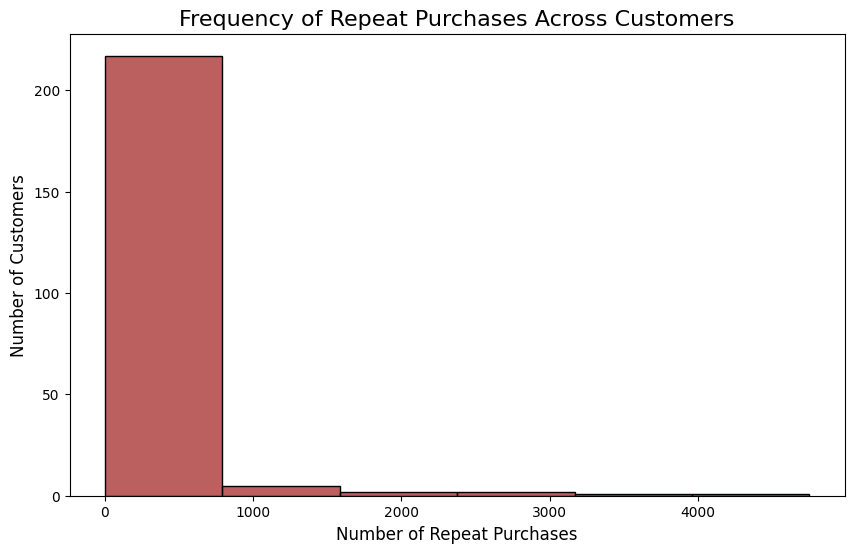

In [630]:
# Create the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(repeat_frequency["Frequency"], kde=False, bins=6, color="brown")

# Add labels and title
plt.title("Frequency of Repeat Purchases Across Customers", fontsize=16)
plt.xlabel("Number of Repeat Purchases", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

# Show the plot
plt.show()


We observed that among our customers, those who made repeat purchases twice had the highest frequency, with 4752 occurrences, followed by customers who made three repeat purchases. This indicates that the majority of our customers tend to return and make at least two purchases.

4. What are the top-performing products in terms of sales quantity and revenue?

In [631]:
Commerce_df['Revenue']= Commerce_df['Quantity'] * Commerce_df['UnitPrice']

In [632]:
Commerce_df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,4796.22
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,370.95
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50


In [633]:
top_performing_products = Commerce_df.groupby('Description')['Revenue'].sum().reset_index()
top_performing_products = top_performing_products.sort_values(by='Revenue', ascending=False)


In [634]:
# Divide Revenue by a million and rename the column
top_performing_products['Revenue (Million)'] = top_performing_products['Revenue'] / 1_000_000

# Optional: If you no longer want the original 'Revenue' column, you can drop it
top_performing_products = top_performing_products.drop(columns=['Revenue'])

In [635]:
top_performing_products

,Description,Revenue (Million)
7,Shoes,104.705494
5,Jewelry,104.233481
8,Sports Equipment,104.068224
1,Cloths,103.972283
4,Furniture,103.900362
9,Toys,103.897985
3,Electronics,103.493033
6,Kitchenware,103.412329
2,Cosmetics,103.237175
0,Books,102.515356


In [636]:
top_performing_quantity = Commerce_df.groupby('Description')['Quantity'].sum().reset_index()
top_performing_quantity = top_performing_quantity.sort_values(by='Quantity', ascending=False)
top_performing_quantity 

,Description,Quantity
7,Shoes,2069190
5,Jewelry,2065153
9,Toys,2063396
4,Furniture,2063221
8,Sports Equipment,2060571
1,Cloths,2054709
2,Cosmetics,2051088
6,Kitchenware,2046704
3,Electronics,2036733
0,Books,2025341


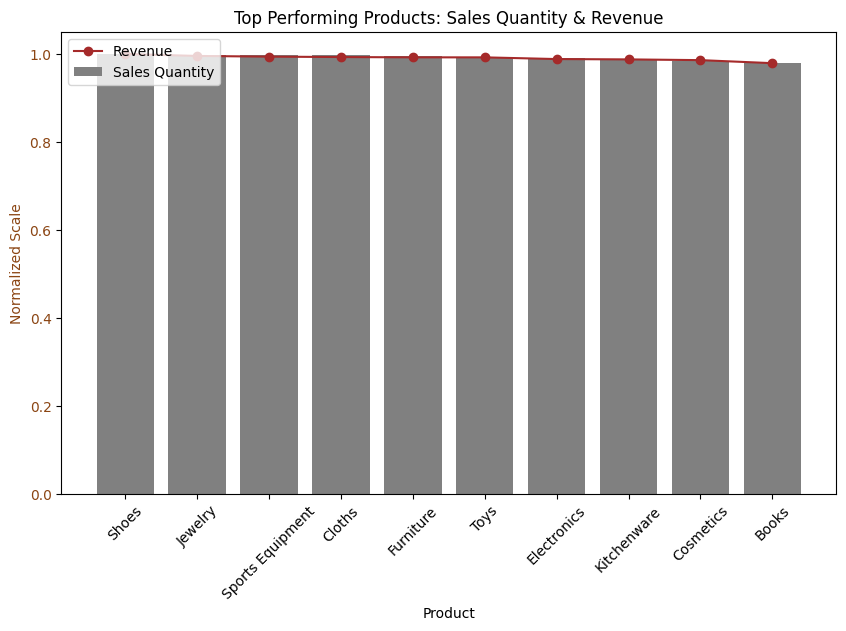

In [637]:
# Normalize Revenue and Quantity
top_performing_products['Revenue (Normalized)'] = top_performing_products['Revenue (Million)'] / top_performing_products['Revenue (Million)'].max()
top_performing_quantity['Quantity (Normalized)'] = top_performing_quantity['Quantity'] / top_performing_quantity['Quantity'].max()

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot normalized Sales Quantity as bars
ax1.bar(top_performing_products['Description'], top_performing_quantity['Quantity (Normalized)'], color='gray', label='Sales Quantity')
ax1.set_xlabel('Product')
ax1.set_ylabel('Normalized Scale', color='#8B4513')
ax1.tick_params(axis='y', labelcolor='#8B4513')

# Plot normalized Revenue as a line
ax1.plot(top_performing_products['Description'], top_performing_products['Revenue (Normalized)'], color='brown', marker='o', label='Revenue')

# Add title and rotate x-axis labels
plt.title('Top Performing Products: Sales Quantity & Revenue')
plt.xticks(rotation=45)

# Add a legend for clarity
ax1.legend(['Revenue', 'Sales Quantity'], loc='upper left')

# Display the plot
plt.show()


From our analysis, we found that shoes had the highest sales, with both the largest quantity sold and the highest revenue generated compared to other categories, followed by jewelry. However, sports equipment ranked third in revenue generation, despite selling fewer units than toys. Books, on the other hand, generated the least sales and revenue.

5. What is the revenue trend over time (monthly)?

In [638]:
Commerce_df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,4796.22
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,370.95
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50


In [639]:
Commerce_df['Month'] = Commerce_df['InvoiceDate'].dt.to_period('M')  # Extract month
monthly_revenue = Commerce_df.groupby('Month')['Revenue'].sum().reset_index()

# Example: Weekly Revenue
Commerce_df['Week'] = Commerce_df['InvoiceDate'].dt.to_period('W')  # Extract week
weekly_revenue = Commerce_df.groupby('Week')['Revenue'].sum().reset_index()


In [640]:
monthly_revenue

,Month,Revenue
0,2010-12,6.792367e+07
1,2011-01,5.582933e+07
2,2011-02,5.208536e+07
3,2011-03,7.137210e+07
4,2011-04,5.914003e+07
5,2011-05,7.434151e+07
6,2011-06,7.109639e+07
7,2011-07,7.040789e+07
8,2011-08,6.994326e+07
9,2011-09,1.036281e+08


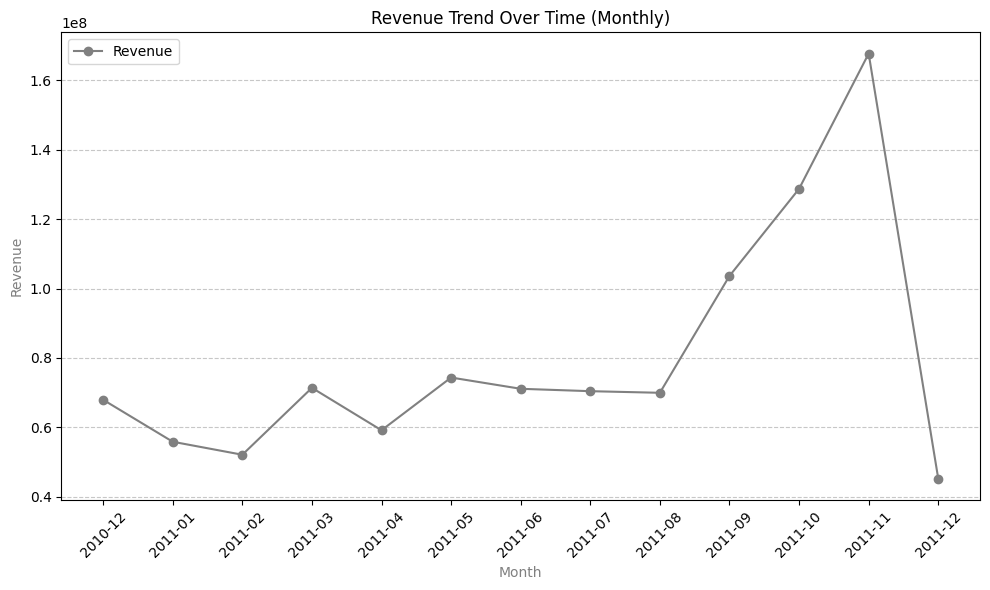

In [641]:
# Plot Revenue Trend (e.g., Monthly Trend)
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['Month'].astype(str), monthly_revenue['Revenue'], marker='o', color='gray', label='Revenue')
plt.title('Revenue Trend Over Time (Monthly)')
plt.xlabel('Month', color='gray')
plt.ylabel('Revenue', color='gray')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


From our analysis, we observed the revenue trend starting from December 2010. Initially, there was a slight decline through February 2011, followed by a recovery. The revenue then fluctuated until August 2011, where it reached its peak at 167.7 million dollars in November 2011. However, it experienced a major drop, reaching its lowest point of 45.1 million dollars in December 2011.

6.  How does customer behavior differ on weekdays vs. weekends?

In [642]:
Commerce_df['Day_Name'] = Commerce_df['InvoiceDate'].dt.day_name()


In [643]:
# Categorize as Weekday or Weekend
Commerce_df['Day_Type'] = Commerce_df['Day_Name'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

In [644]:
behavior_comparison = Commerce_df.groupby('Day_Type').agg({
    'Revenue': ['sum', 'mean'],  # Total and average revenue
    'CustomerID': 'nunique'      # Number of unique customers
}).reset_index()

In [645]:
behavior_comparison.columns = ['Day Type', 'Total Revenue', 'Average Revenue', 'Unique Customers']


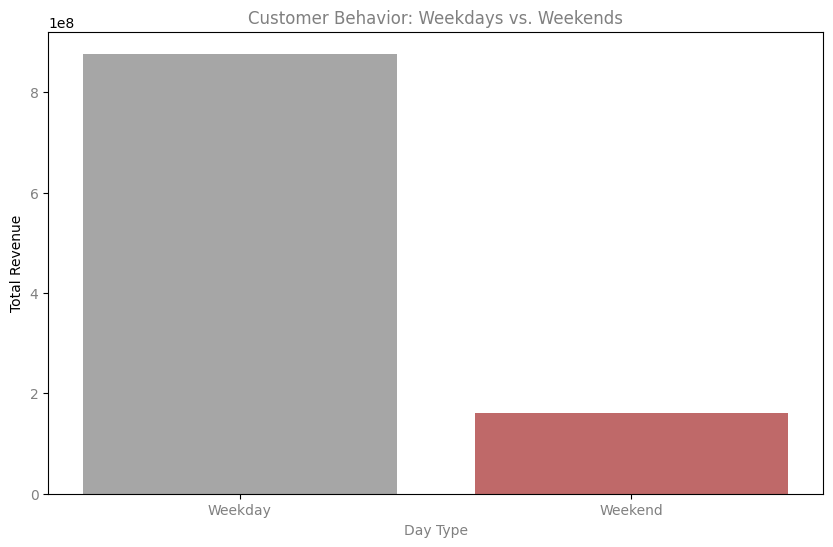

In [646]:
# Visualize: Bar plot for total revenue
plt.figure(figsize=(10, 6))
plt.bar(behavior_comparison['Day Type'], behavior_comparison['Total Revenue'], color=['gray', 'brown'], alpha=0.7, label='Total Revenue')

# Add labels and title
plt.title('Customer Behavior: Weekdays vs. Weekends', color='gray')
plt.xlabel('Day Type', color='gray')
plt.ylabel('Total Revenue')
plt.xticks(color='gray')
plt.yticks(color='gray')

plt.show()


We discovered that our unique customers placed more orders during weekdays than on weekends. This resulted in generating a total revenue of 876.49 million dollars, with 4135 customers contributing to this amount.

7. What is the average unit price for each product?

In [647]:
Commerce_df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,Month,Week,Day_Name,Day_Type
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95,2010-12,2010-11-29/2010-12-05,Wednesday,Weekday
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95,2010-12,2010-11-29/2010-12-05,Wednesday,Weekday
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,4796.22,2010-12,2010-11-29/2010-12-05,Wednesday,Weekday
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,370.95,2010-12,2010-11-29/2010-12-05,Wednesday,Weekday
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50,2010-12,2010-11-29/2010-12-05,Wednesday,Weekday


In [648]:
Avg_price = Commerce_df.groupby('Description')['UnitPrice'].mean().reset_index()
Avg_price = Avg_price.sort_values(by='UnitPrice', ascending=False)
Avg_price

,Description,UnitPrice
3,Electronics,50.639892
7,Shoes,50.601603
5,Jewelry,50.584288
1,Cloths,50.572772
0,Books,50.478542
8,Sports Equipment,50.456126
9,Toys,50.411649
4,Furniture,50.406568
6,Kitchenware,50.401517
2,Cosmetics,50.223179


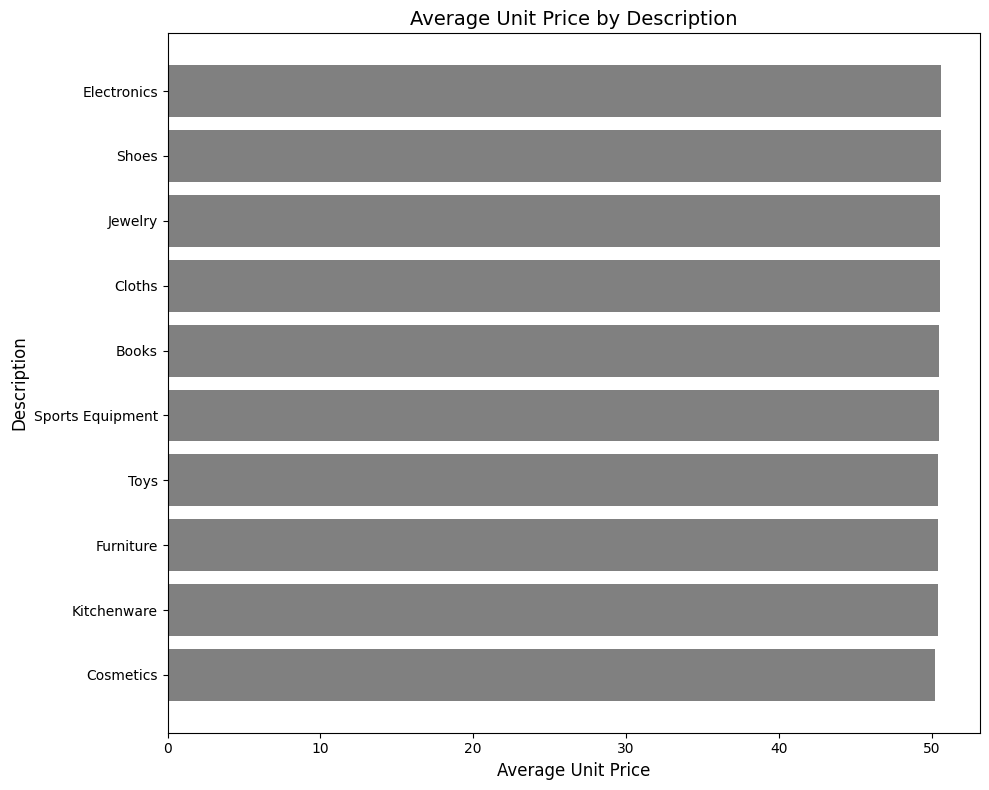

In [649]:
# Plotting the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(Avg_price['Description'], Avg_price['UnitPrice'], color='gray')
plt.xlabel('Average Unit Price', fontsize=12)
plt.ylabel('Description', fontsize=12)
plt.title('Average Unit Price by Description', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.tight_layout()
plt.show()

From our analysis, we discovered that electronics have the highest unit price at 50.64 dollars, followed closely by shoes at 50.60 dollars, and cosmetics at 50.22 dollars. Despite the small differences, electronics lead in price.

8. Which countries generate the highest average revenue per order?

In [650]:
avg_revenue = Commerce_df.groupby('Country')['Revenue'].mean().reset_index()
avg_revenue = avg_revenue.sort_values(by='Revenue', ascending=False).head()
avg_revenue 

,Country,Revenue
11,Mali,2619.489281
9,Libya,2584.186654
23,Togo,2581.902264
19,Somalia,2569.857435
20,South Africa,2564.017804


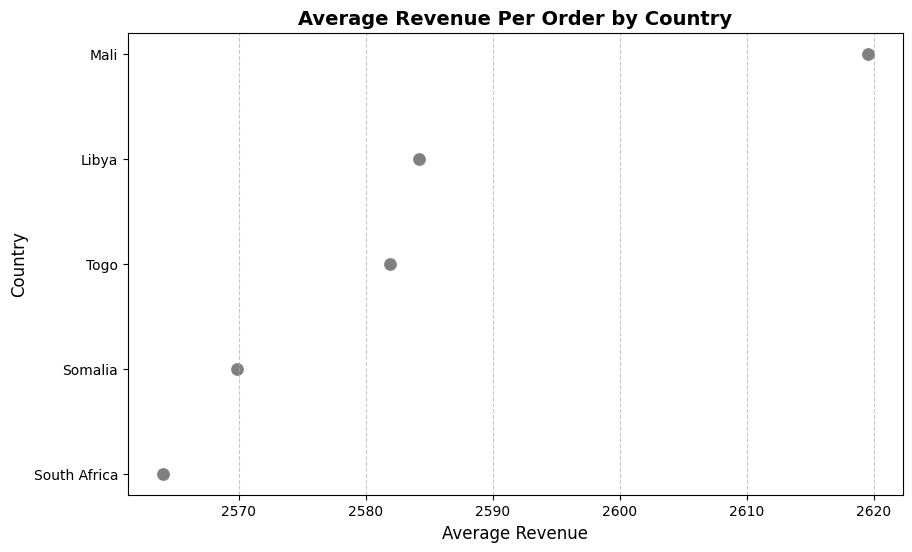

In [651]:
# Plotting the dot plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Revenue', 
    y='Country', 
    data=avg_revenue, 
    color='gray', 
    s=100  # Dot size
)

# Add titles and labels
plt.title('Average Revenue Per Order by Country', fontsize=14, fontweight='bold')
plt.xlabel('Average Revenue', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Optional: Add gridlines for easier comparison
plt.grid(axis='x', linestyle='--', alpha=0.7)



Analysis reveals that Mali, Libya, Togo, Somalia, and South Africa are the top countries with the highest average revenue, with Mali leading at $2,619.49 million.

9. Which countries have the highest concentration of unique customers?

In [652]:
country_customers = Commerce_df.groupby('Country')['CustomerID'].nunique().reset_index()
country_customers = country_customers.sort_values(by='CustomerID', ascending=False)
country_customers

,Country,CustomerID
13,Mozambique,3072
1,Benin,3054
23,Togo,3053
15,Nigeria,3051
2,Burkina Faso,3049
18,Sierra Leone,3046
11,Mali,3044
0,Algeria,3043
17,Senegal,3040
14,Niger,3039


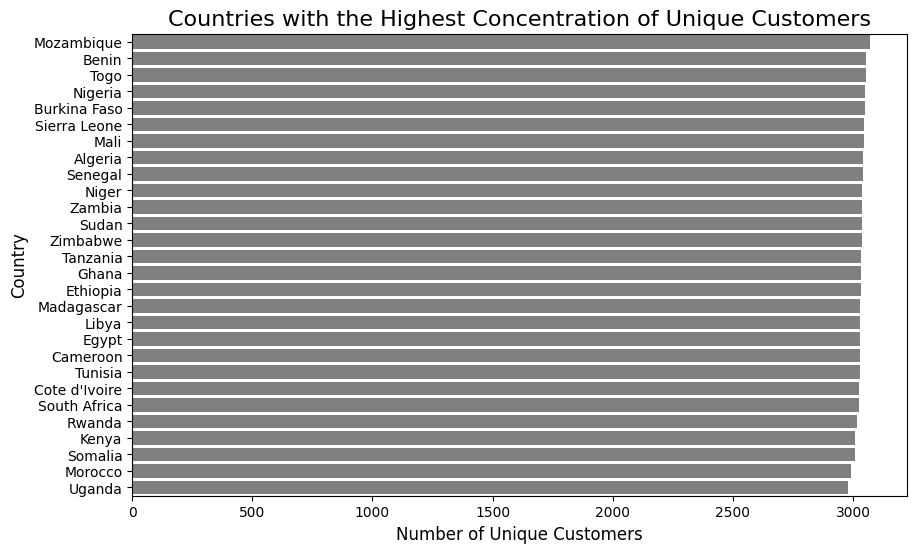

In [653]:
# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="CustomerID", y="Country", data=country_customers, color="gray")

# Add labels and title
plt.title("Countries with the Highest Concentration of Unique Customers", fontsize=16)
plt.xlabel("Number of Unique Customers", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Show the plot
plt.show()


We observed that the majority of our customers come from Mozambique (3,072), followed closely by Benin (3,054) and Togo (3,053), while Uganda has the fewest unique customers.

## HYPOTHESIS

Null Hypothesis (H₀): The average spending of customers from Mozambique is equal to that of customers from other countries.

Alternate Hypothesis (H₁): The average spending of customers from Mozambique is higher than that of customers from other countries.

In [654]:
Mosambique_customer = Commerce_df[Commerce_df['Country'] == 'Mozambique']['Revenue']
other_customer = Commerce_df[Commerce_df['Country'] != 'Mozambique']['Revenue']

In [655]:
revenue_skewness = Commerce_df['Revenue'].skew()
print("Skewness of Revenue:", revenue_skewness)

Skewness of Revenue: 0.9637732508423561


In [656]:

# Mann-Whitney U Test
u_stat, p_val = mannwhitneyu(Mosambique_customer, other_customer, alternative='two-sided')
print(f"Mann-Whitney U statistic: {u_stat}")
print(f"P-value: {p_val}")

Mann-Whitney U statistic: 2867886966.0
P-value: 0.8438668117101864


In [657]:
# our significance level
α = 0.05
# Comparing the p-value with α
if p_val < 0.05:
    print(f"As the p-value {p_val} is less than the level of significance, we reject the Null Hypothesis.")
else:
    print(f"As the p-value {p_val} is greater than the level of significance, we fail to reject the Null Hypothesis.")

As the p-value 0.8438668117101864 is greater than the level of significance, we fail to reject the Null Hypothesis.


Based on the results of the Mann-Whitney U Test, we found that the p-value is greater than the level of significance (α = 0.05). Consequently, we fail to reject the null hypothesis (H₀).

This suggests that there is no statistically significant difference in the average spending of customers from Mozambique compared to those from other countries.

2. Null Hypothesis (H₀): Lower unit prices do not significantly increase the quantity sold.
Alternate Hypothesis (H₁): Lower unit prices significantly increase the quantity sold.

In [658]:
# Check normality for 'Unit Price' and 'Quantity Sold'
_, p_price = shapiro(Commerce_df['UnitPrice'])
_, p_quantity = shapiro(Commerce_df['Quantity'])

print(f"P-value for Unit Price: {p_price}")
print(f"P-value for Quantity Sold: {p_quantity}")


P-value for Unit Price: 9.790604689500064e-117
P-value for Quantity Sold: 4.2812894999116276e-117


/Users/mac/Documents/CUSTOMER-RETENTION-ECOMMERCE-INDUSTRY/venv/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 406829.
  res = hypotest_fun_out(*samples, **kwds)


In [659]:
# Define the median Unit Price
median_unit_price = Commerce_df['UnitPrice'].median()

# Split data into two groups
low_price_quantity = Commerce_df[Commerce_df['UnitPrice'] < median_unit_price]['Quantity']
high_price_quantity = Commerce_df[Commerce_df['UnitPrice'] >= median_unit_price]['Quantity']

# Mann-Whitney U Test
u_stat, p_val = mannwhitneyu(low_price_quantity, high_price_quantity, alternative='greater')
print(f"Mann-Whitney U statistic: {u_stat}")
print(f"P-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("Reject the Null Hypothesis: Lower unit prices significantly increase the quantity sold.")
else:
    print("Fail to Reject the Null Hypothesis: Lower unit prices do not significantly increase the quantity sold.")


Mann-Whitney U statistic: 20632222548.5
P-value: 0.9343219484001878
Fail to Reject the Null Hypothesis: Lower unit prices do not significantly increase the quantity sold.


## COHORT ANALYSIS

In [660]:
Commerce_df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,Month,Week,Day_Name,Day_Type
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95,2010-12,2010-11-29/2010-12-05,Wednesday,Weekday
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95,2010-12,2010-11-29/2010-12-05,Wednesday,Weekday
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,4796.22,2010-12,2010-11-29/2010-12-05,Wednesday,Weekday
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,370.95,2010-12,2010-11-29/2010-12-05,Wednesday,Weekday
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50,2010-12,2010-11-29/2010-12-05,Wednesday,Weekday


In [661]:
def get_cohort_date(Commerce_df):
    Commerce_df['cohort_date'] = Commerce_df.groupby('CustomerID')['InvoiceDate'].transform('min')
    return Commerce_df['cohort_date']

In [662]:
Commerce_df['cohort_date'] = get_cohort_date(Commerce_df)

In [663]:
Commerce_df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,Month,Week,Day_Name,Day_Type,cohort_date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,664.95,2010-12,2010-11-29/2010-12-05,Wednesday,Weekday,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,1862.95,2010-12,2010-11-29/2010-12-05,Wednesday,Weekday,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,4796.22,2010-12,2010-11-29/2010-12-05,Wednesday,Weekday,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,370.95,2010-12,2010-11-29/2010-12-05,Wednesday,Weekday,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,1941.50,2010-12,2010-11-29/2010-12-05,Wednesday,Weekday,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09,12680.0,SC5440,Furniture,25,36.53,Mozambique,913.25,2011-12,2011-12-05/2011-12-11,Friday,Weekday,2011-08-18
541905,581587,2011-12-09,12680.0,SC3576,Cloths,94,90.65,Tunisia,8521.10,2011-12,2011-12-05/2011-12-11,Friday,Weekday,2011-08-18
541906,581587,2011-12-09,12680.0,SC5283,Furniture,14,40.07,Somalia,560.98,2011-12,2011-12-05/2011-12-11,Friday,Weekday,2011-08-18
541907,581587,2011-12-09,12680.0,SC1099,Cosmetics,45,79.83,Senegal,3592.35,2011-12,2011-12-05/2011-12-11,Friday,Weekday,2011-08-18


In [664]:
def get_year_cohort(Commerce_df, col):

    month = Commerce_df[col].dt.month
    year = Commerce_df[col].dt.year
    return month, year

In [665]:
first_month, first_year = get_year_cohort(Commerce_df, 'cohort_date')

In [666]:
first_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: cohort_date, Length: 406829, dtype: int32

In [667]:
first_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: cohort_date, Length: 406829, dtype: int32

In [668]:
last_month, last_year = get_year_cohort(Commerce_df, 'InvoiceDate')

In [669]:
last_month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int32

In [670]:
last_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 406829, dtype: int32

#### Cohort index

In [671]:
def get_cohort_index(first_month, first_year, last_month, last_year):
    year_diff = last_year - first_year
    month_diff = last_month - first_month
    index = year_diff * 12 + month_diff + 1
    return index

In [672]:
Commerce_df['cohort_index'] = get_cohort_index(first_month, first_year, last_month, last_year)

#### Cohort_table

In [673]:
cohort_info = Commerce_df.groupby(['cohort_date', 'cohort_index'])['CustomerID'].nunique().reset_index()
cohort_info.rename(columns={'CustomerID': 'No_of_customer'}, inplace=True)

In [674]:
cohort_info

,cohort_date,cohort_index,No_of_customer
0,2010-12-01,1,98
1,2010-12-01,2,42
2,2010-12-01,3,38
3,2010-12-01,4,32
4,2010-12-01,5,41
...,...,...,...
1971,2011-12-05,1,7
1972,2011-12-06,1,9
1973,2011-12-07,1,5
1974,2011-12-08,1,4


In [675]:
cohort_info['cohort_date'] = cohort_info['cohort_date'].dt.to_period('M')  # This converts to 'YYYY-MM' format (more efficient)


In [676]:
cohort_info

,cohort_date,cohort_index,No_of_customer
0,2010-12,1,98
1,2010-12,2,42
2,2010-12,3,38
3,2010-12,4,32
4,2010-12,5,41
...,...,...,...
1971,2011-12,1,7
1972,2011-12,1,9
1973,2011-12,1,5
1974,2011-12,1,4


In [677]:
cohort_info = cohort_info.set_index('cohort_date')

In [678]:
cohort_info

,cohort_index,No_of_customer
cohort_date,,
2010-12,1,98
2010-12,2,42
2010-12,3,38
2010-12,4,32
2010-12,5,41
...,...,...
2011-12,1,7
2011-12,1,9
2011-12,1,5


In [679]:
aggregated_data = (
    cohort_info.groupby(['cohort_date', 'cohort_index'])['No_of_customer']
    .sum()
    .reset_index()
)

In [680]:
aggregated_data

,cohort_date,cohort_index,No_of_customer
0,2010-12,1,948
1,2010-12,2,362
2,2010-12,3,317
3,2010-12,4,367
4,2010-12,5,341
...,...,...,...
86,2011-10,2,93
87,2011-10,3,46
88,2011-11,1,321
89,2011-11,2,43


In [681]:
# Pivot the table
cohort_tables = aggregated_data.pivot(index='cohort_date', columns='cohort_index', values='No_of_customer')


In [682]:
cohort_tables

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


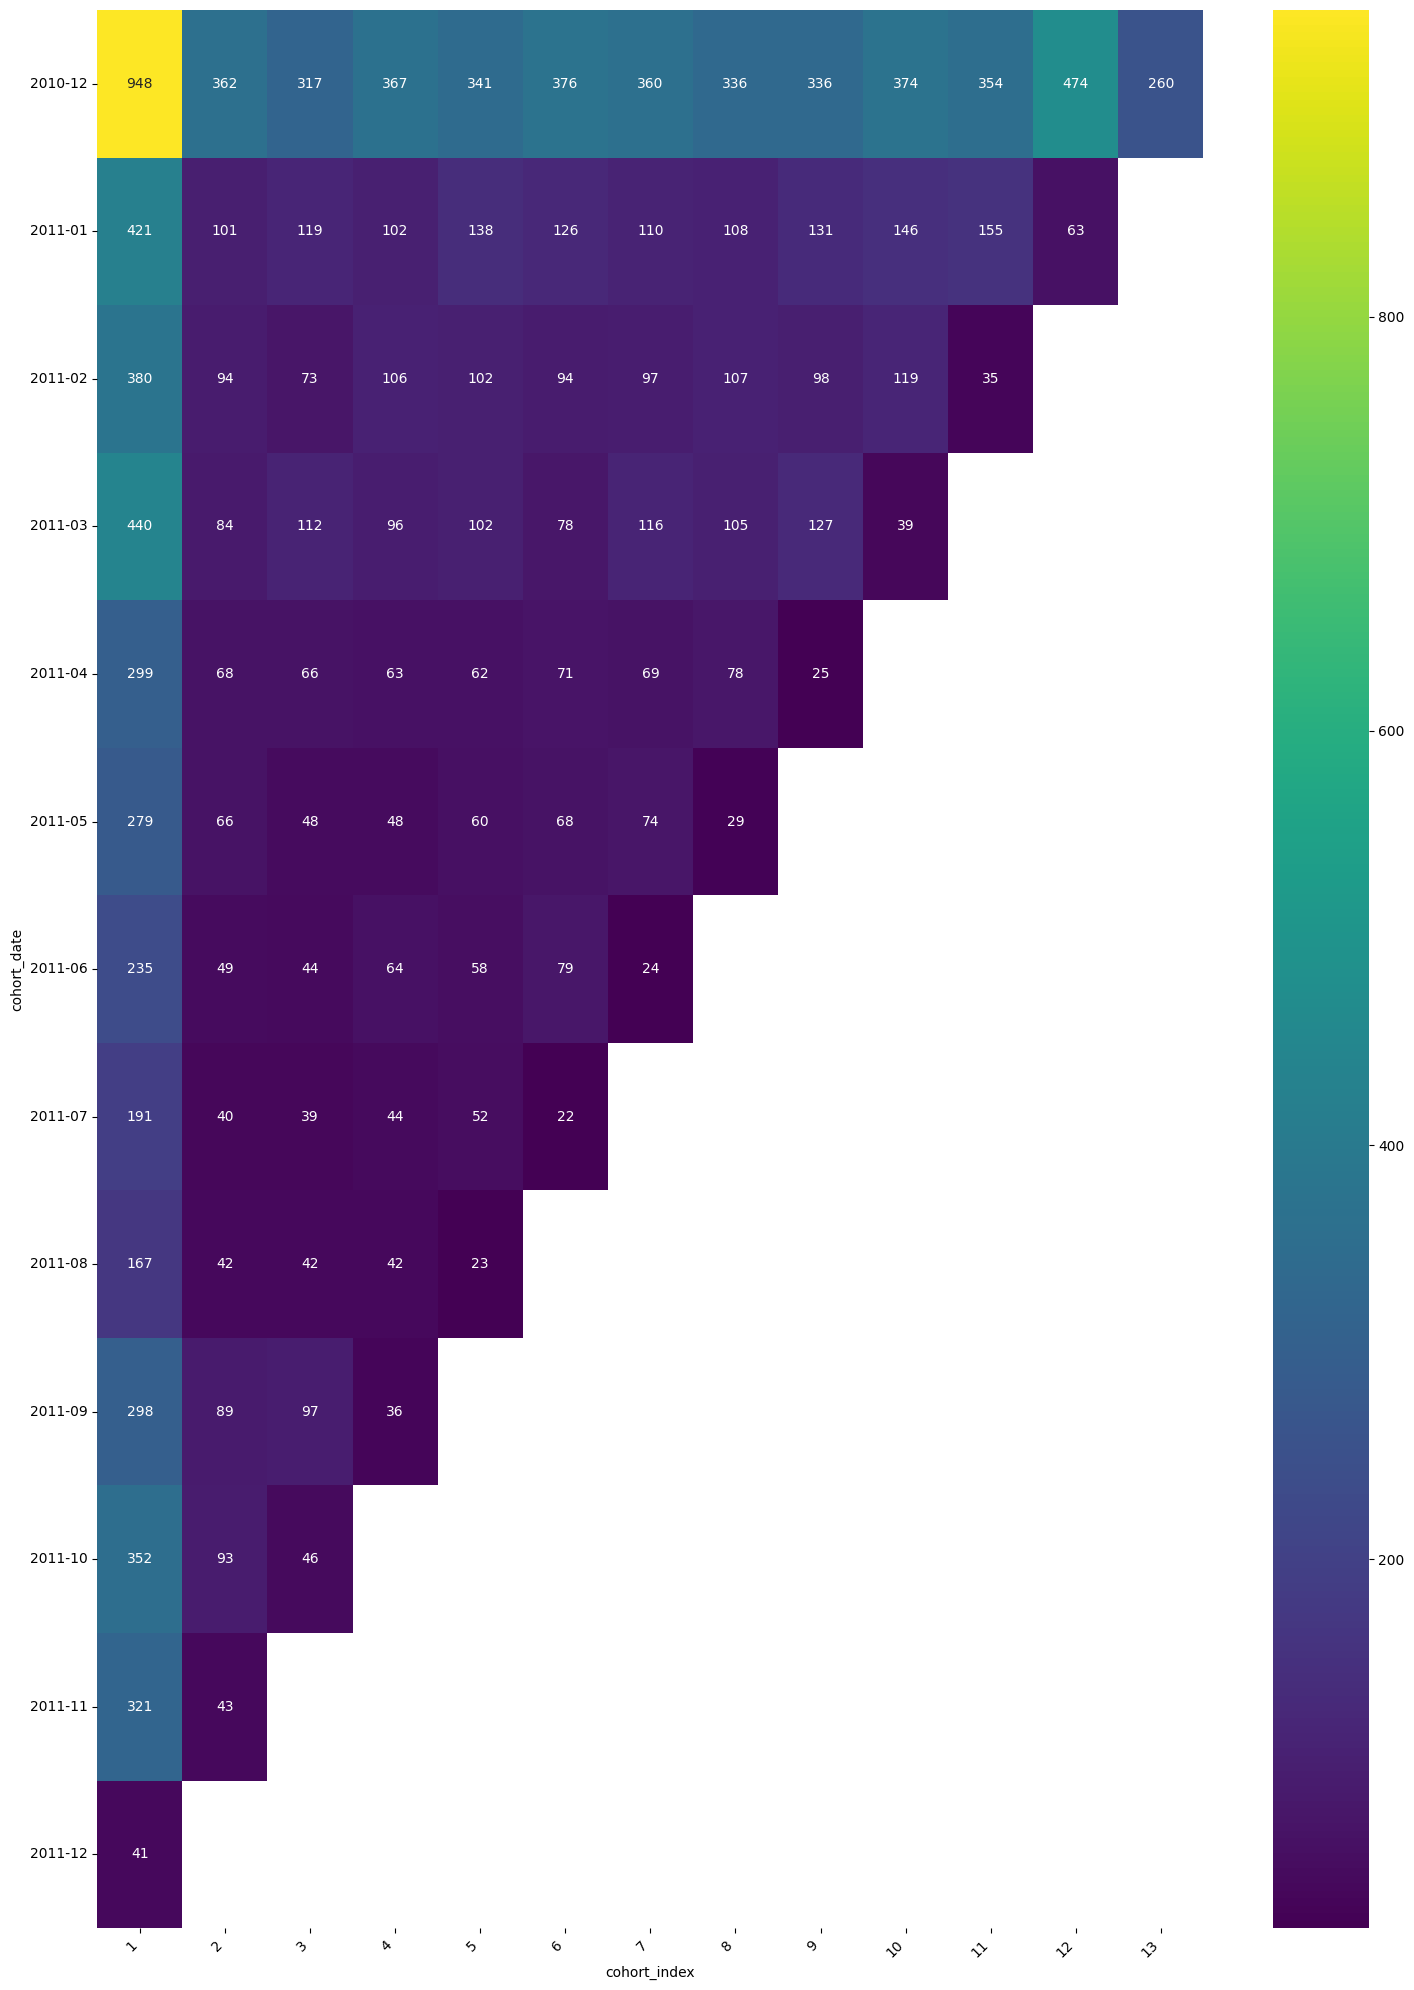

In [683]:
plt.figure(figsize= (15,20))
sns.heatmap(cohort_tables, annot= True, cmap="viridis", fmt= '.0f')
# Rotate x-axis and y-axis tick labels
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)               # Keep y-axis labels horizontal

# Adjust layout to prevent clipping
plt.tight_layout()

# Show plot
plt.show()


In [691]:
new_cohort_tables = cohort_tables.divide(cohort_tables.iloc[:,0], axis = 0)

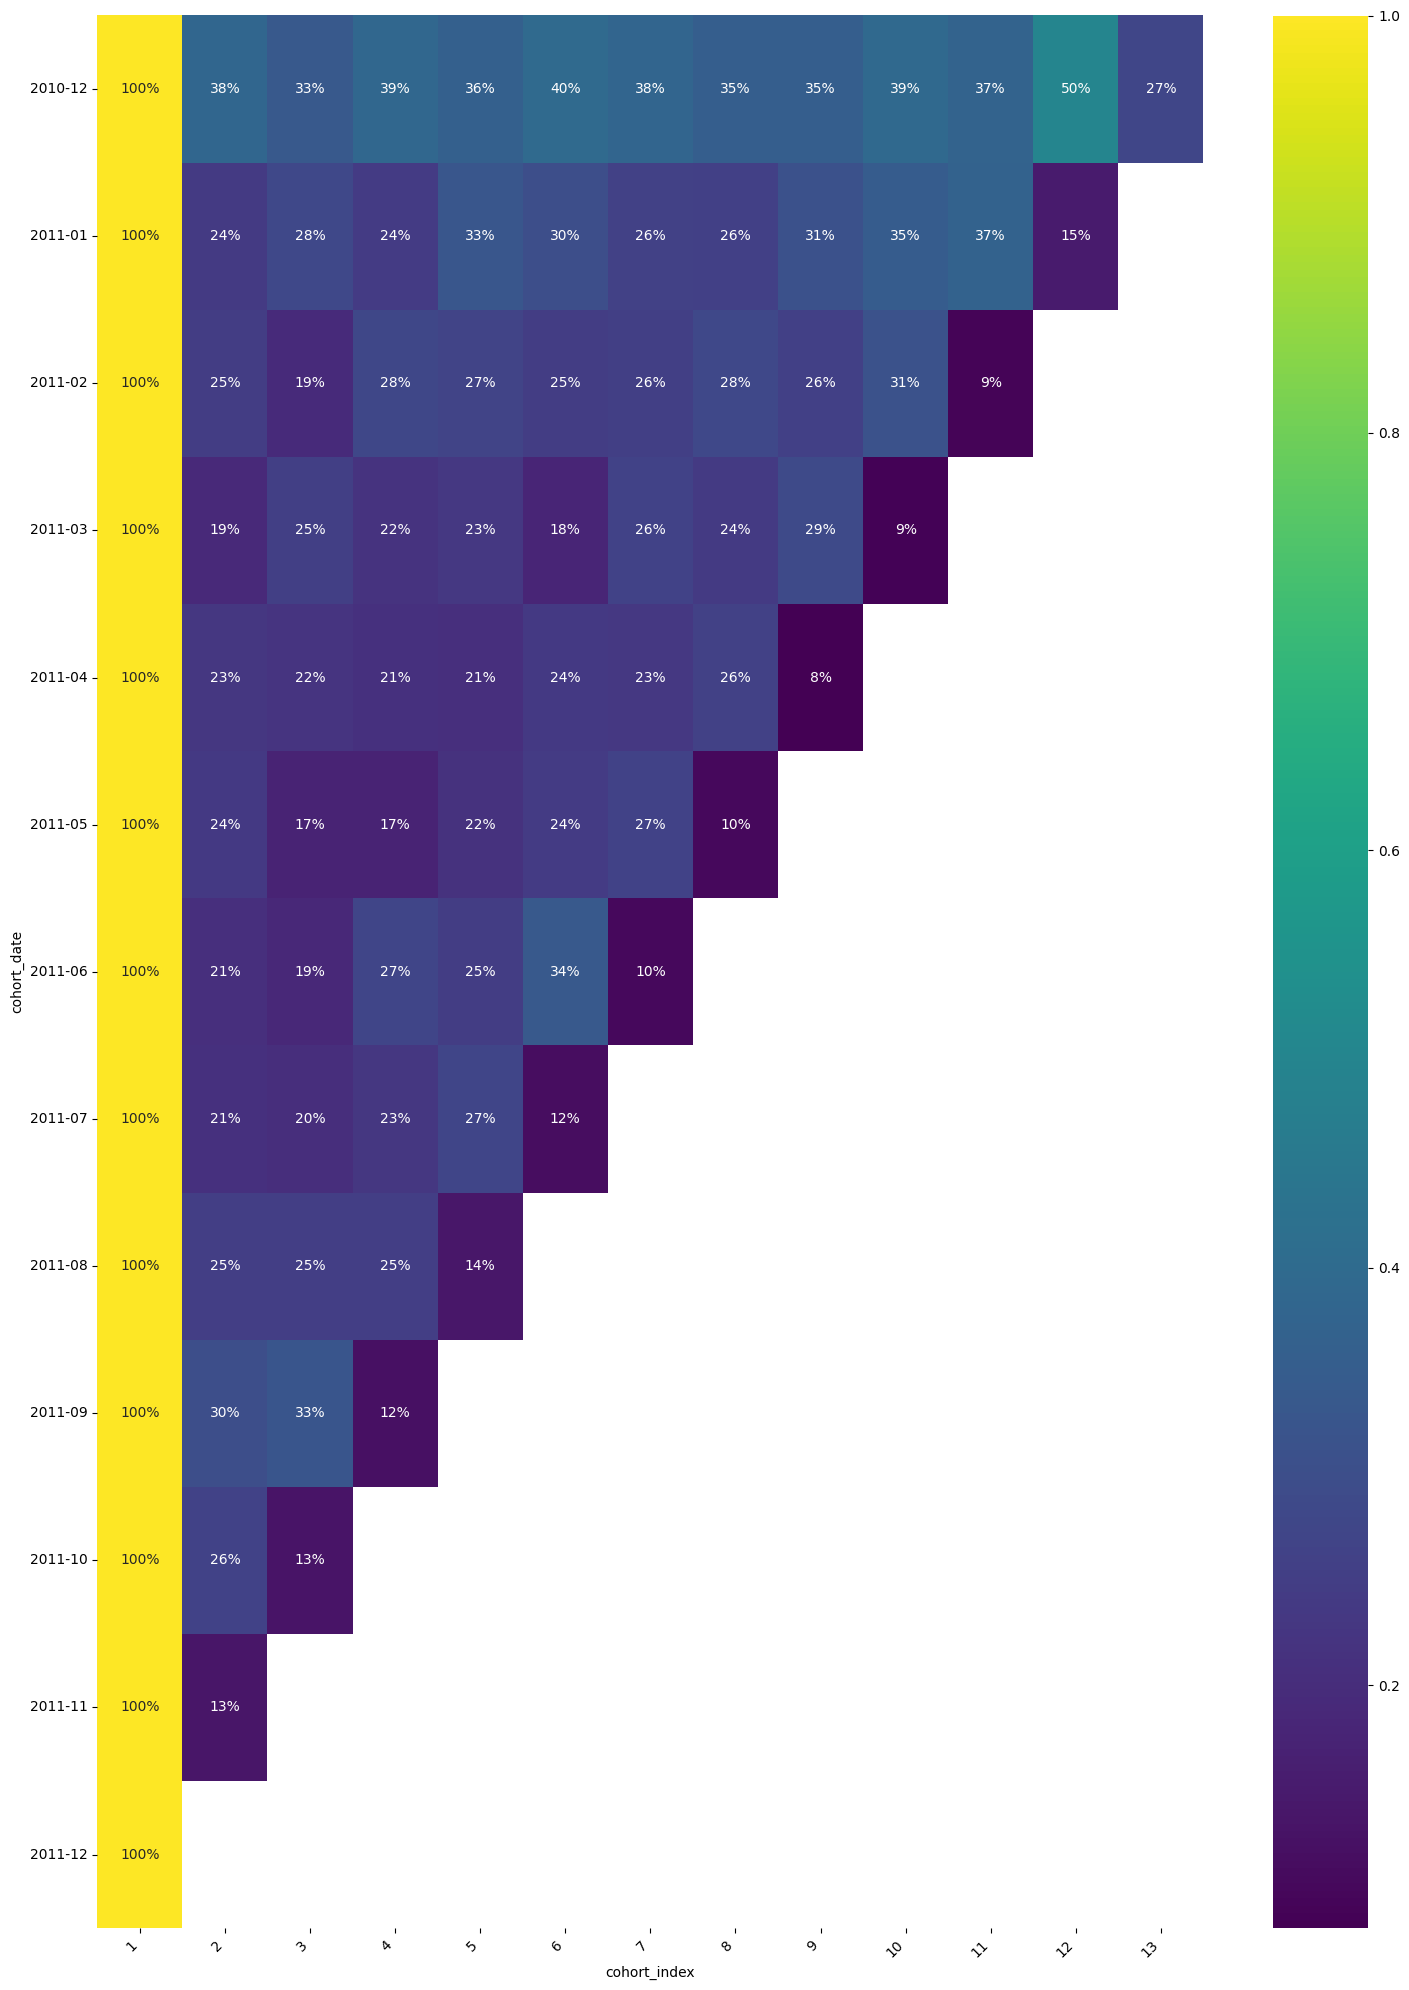

In [692]:
plt.figure(figsize= (15,20))
sns.heatmap(new_cohort_tables, annot= True, cmap="viridis", fmt= '.0%')
# Rotate x-axis and y-axis tick labels
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)               # Keep y-axis labels horizontal

# Adjust layout to prevent clipping
plt.tight_layout()

# Show plot
plt.show()

#### Analyzing Quantity bought

In [695]:
quantity_bought = Commerce_df.groupby(['cohort_date','cohort_index'])['Quantity'].sum().reset_index()

,cohort_date,cohort_index,Quantity
0,2010-12-01,1,232705
1,2010-12-01,2,91402
2,2010-12-01,3,89081
3,2010-12-01,4,104171
4,2010-12-01,5,95449
...,...,...,...
1971,2011-12-05,1,9893
1972,2011-12-06,1,12490
1973,2011-12-07,1,9952
1974,2011-12-08,1,2327


In [700]:
quantity_bought['cohort_date'] = quantity_bought ['cohort_date'].dt.to_period('M') 

In [701]:
quantity_bought = quantity_bought.set_index('cohort_date')

In [702]:
aggregated_quantity_data = (
    quantity_bought.groupby(['cohort_date', 'cohort_index'])['Quantity']
    .sum()
    .reset_index()
)

In [706]:
# Pivot the table
Quantity_table = aggregated_quantity_data.pivot(index='cohort_date', columns='cohort_index', values='Quantity')
Quantity_table 

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
2010-12,1350834.0,546873.0,462374.0,613244.0,510943.0,636443.0,597676.0,604504.0,600481.0,757806.0,725896.0,1165046.0,375469.0
2011-01,559013.0,121074.0,155931.0,120023.0,194675.0,166585.0,144835.0,149848.0,200661.0,258400.0,330607.0,76504.0,NaN
2011-02,450020.0,74008.0,98850.0,122918.0,111386.0,104214.0,108442.0,135276.0,151180.0,145405.0,21787.0,NaN,NaN
2011-03,563434.0,74215.0,125519.0,119480.0,122078.0,107554.0,139852.0,182259.0,212009.0,49685.0,NaN,NaN,NaN
2011-04,371021.0,71541.0,66410.0,65115.0,70639.0,105065.0,97319.0,110572.0,27119.0,NaN,NaN,NaN,NaN
2011-05,308885.0,55453.0,44637.0,45690.0,76473.0,118534.0,97156.0,41183.0,NaN,NaN,NaN,NaN,NaN
2011-06,285867.0,47847.0,35516.0,76483.0,88504.0,127400.0,31264.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,254889.0,25983.0,68721.0,69466.0,91529.0,26831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,243542.0,80156.0,144849.0,141888.0,45405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


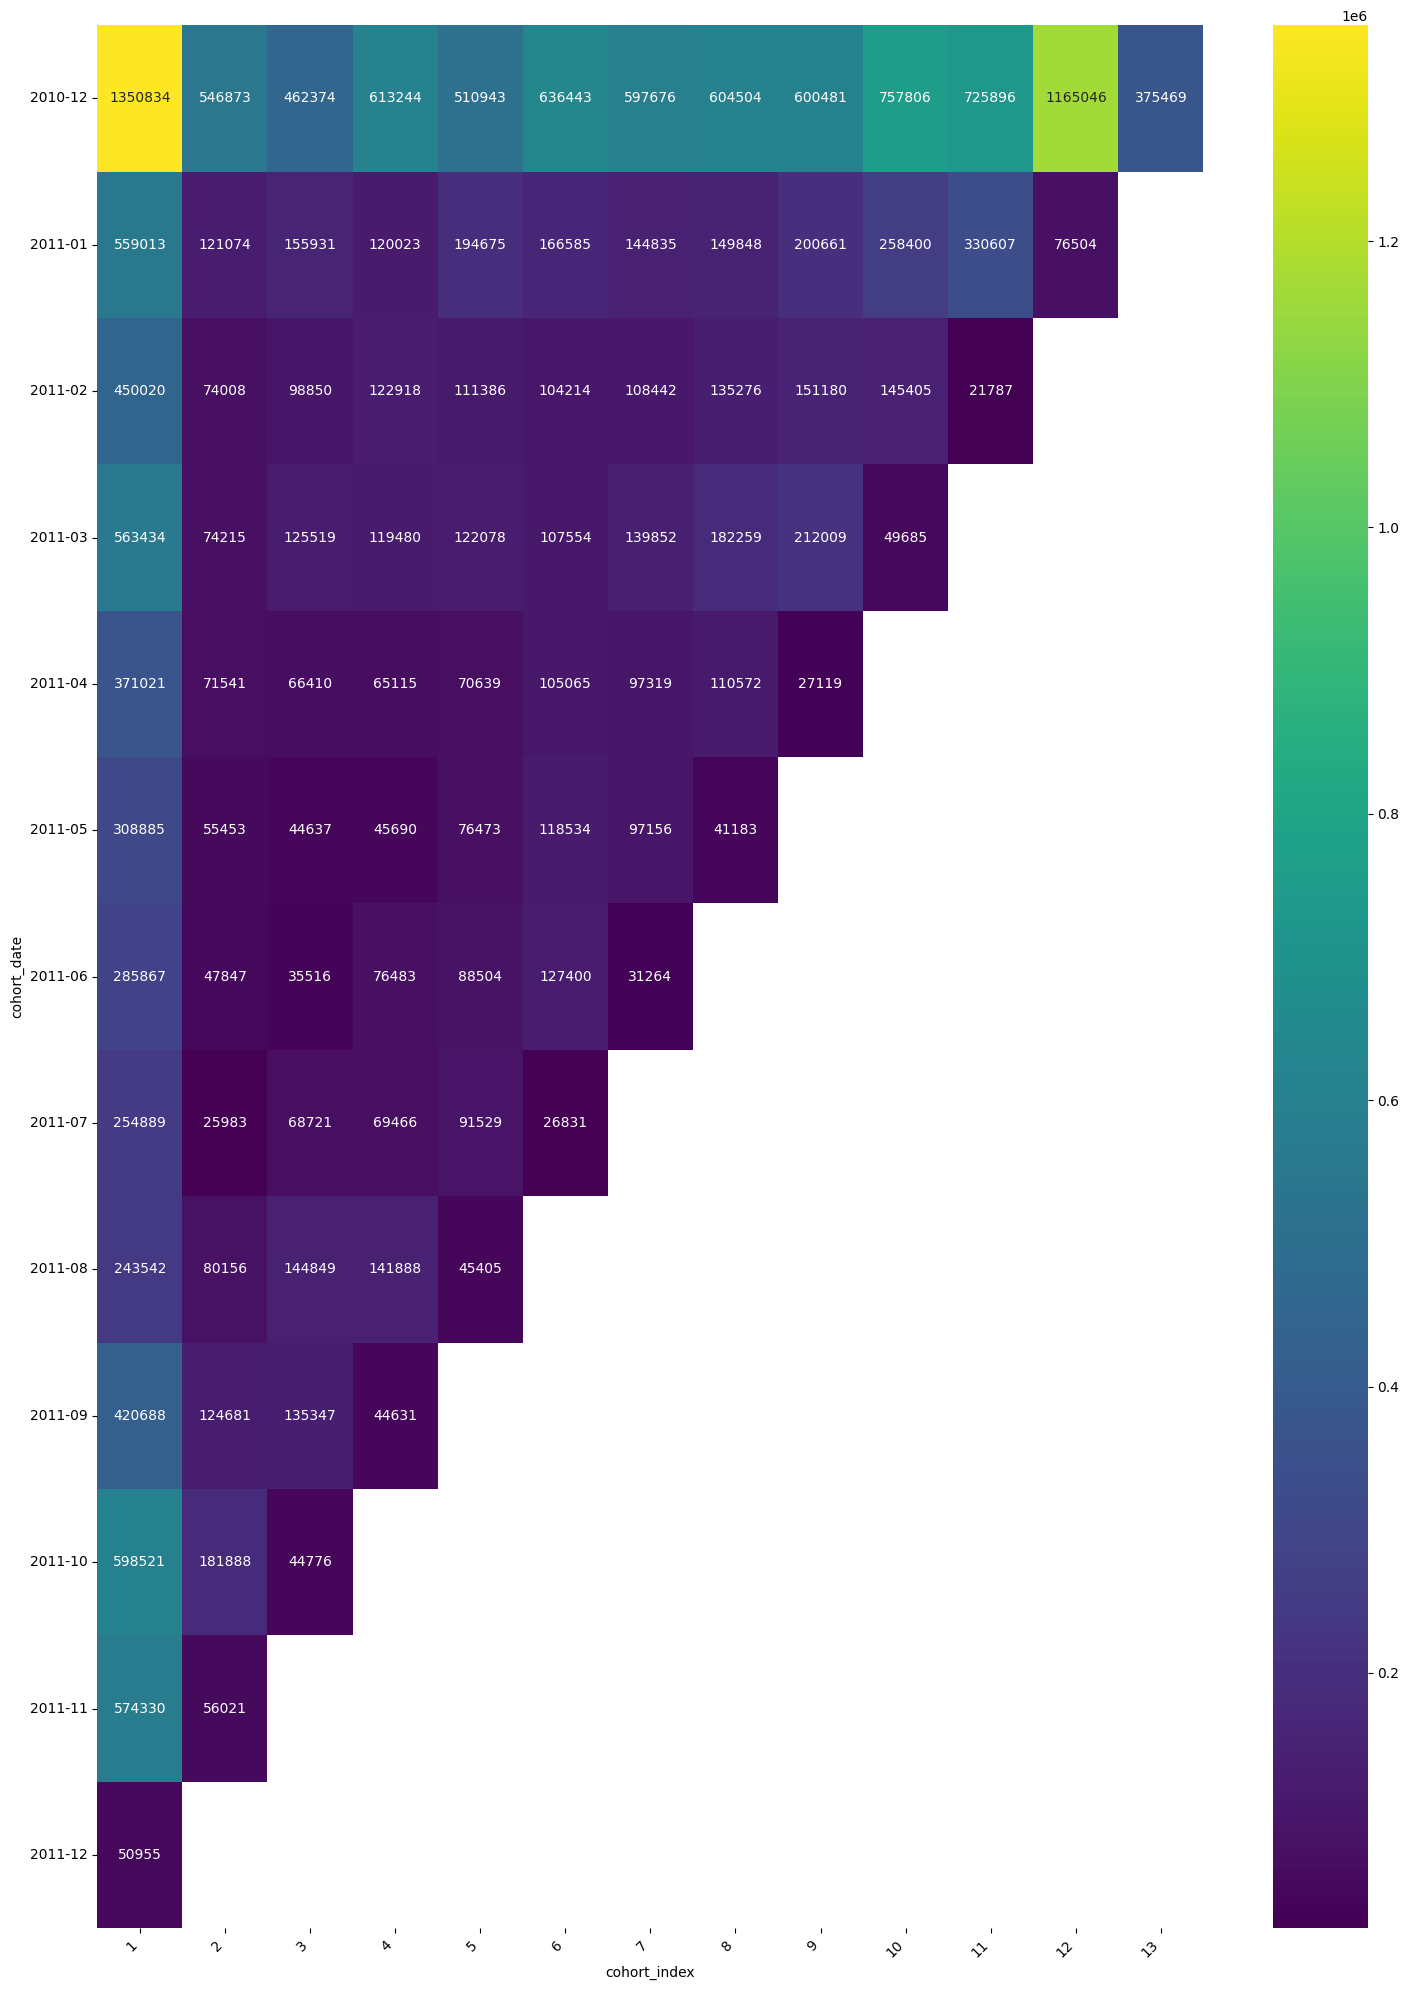

In [707]:
plt.figure(figsize= (15,20))
sns.heatmap(Quantity_table , annot= True, cmap="viridis", fmt= '.0f')
# Rotate x-axis and y-axis tick labels
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)               # Keep y-axis labels horizontal

# Adjust layout to prevent clipping
plt.tight_layout()

# Show plot
plt.show()


In [709]:
new_Quantity_table = Quantity_table.divide(Quantity_table.iloc[:,0], axis = 0)
new_Quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
2010-12,1.0,0.404841,0.342288,0.453974,0.378243,0.471148,0.442450,0.447504,0.444526,0.560991,0.537369,0.862464,0.277953
2011-01,1.0,0.216585,0.278940,0.214705,0.348248,0.297998,0.259091,0.268058,0.358956,0.462243,0.591412,0.136855,NaN
2011-02,1.0,0.164455,0.219657,0.273139,0.247513,0.231576,0.240972,0.300600,0.335941,0.323108,0.048413,NaN,NaN
2011-03,1.0,0.131719,0.222775,0.212057,0.216668,0.190890,0.248214,0.323479,0.376280,0.088182,NaN,NaN,NaN
2011-04,1.0,0.192822,0.178993,0.175502,0.190391,0.283178,0.262301,0.298021,0.073093,NaN,NaN,NaN,NaN
2011-05,1.0,0.179526,0.144510,0.147919,0.247578,0.383748,0.314538,0.133328,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.167375,0.124240,0.267547,0.309599,0.445662,0.109366,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.101938,0.269611,0.272534,0.359094,0.105265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.329126,0.594760,0.582602,0.186436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


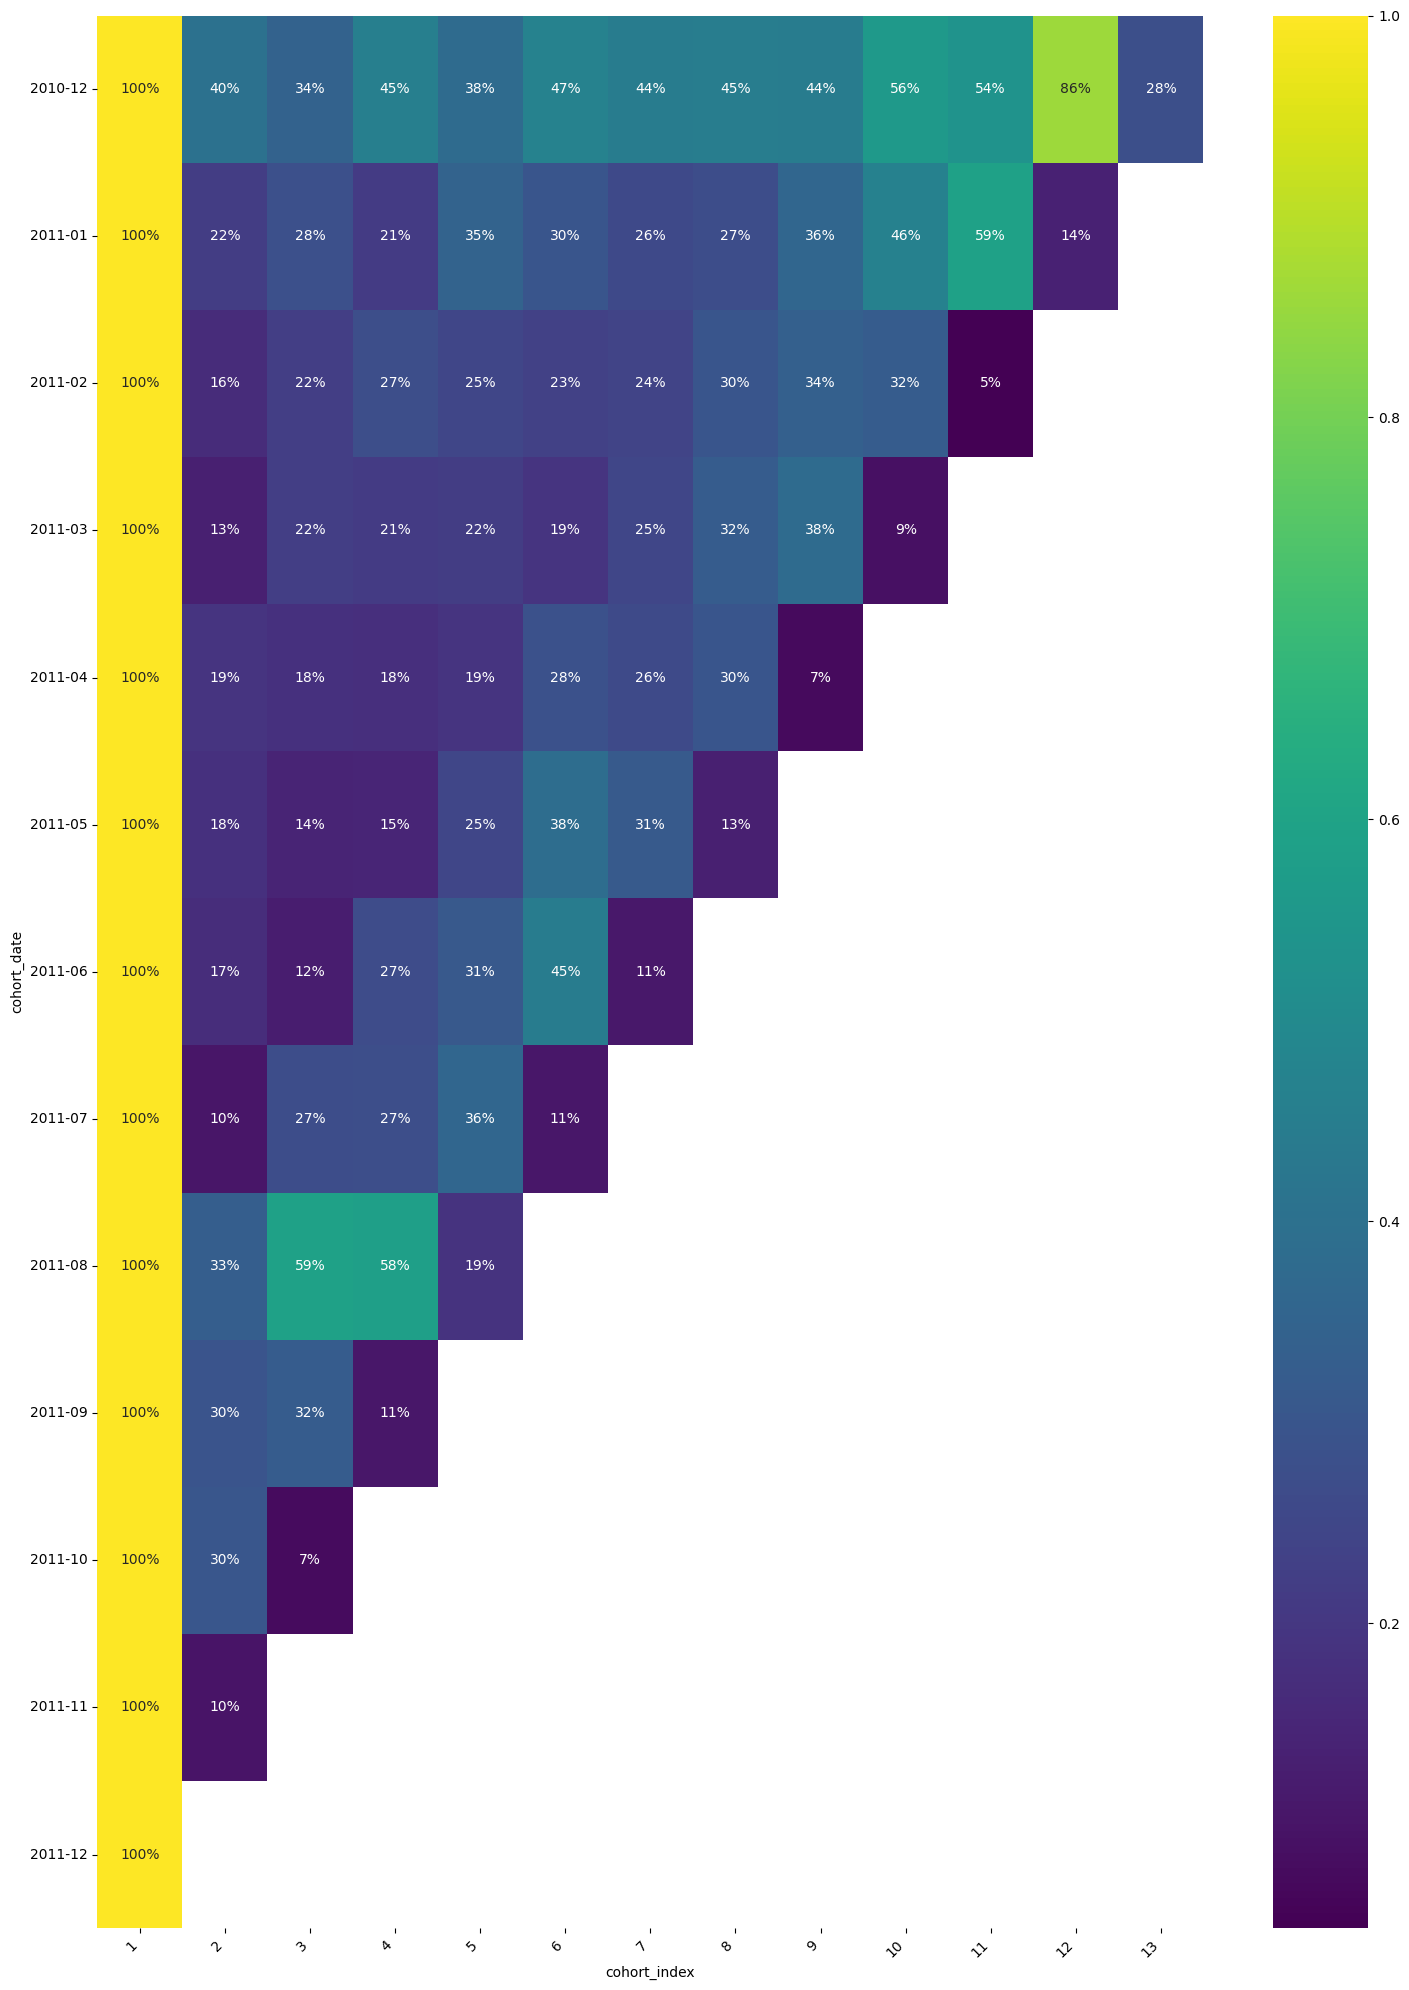

In [712]:
plt.figure(figsize= (15,20))
sns.heatmap(new_Quantity_table , annot= True, cmap="viridis", fmt= '.0%')
# Rotate x-axis and y-axis tick labels
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)               # Keep y-axis labels horizontal

# Adjust layout to prevent clipping
plt.tight_layout()

# Show plot
plt.show()


## CONCLUSION

In conclusion, our analysis highlights that the December 2010 cohort was the strongest, with retention rates ranging from 27% to 50% during the initial stages of sales. However, a significant decline in sales performance was observed in November and December, as reflected in the sales chart. Furthermore, the cohort analysis revealed notable underperformance across all cohorts in December 2011, which calls for further investigation into factors such as market trends and the effectiveness of our advertising strategies during that period. Addressing these issues could provide valuable insights to enhance future sales and retention strategies.

Additionally, we observed that the average quantity ordered remained relatively stable, indicating that even though the number of orders has decreased, customers who were retained likely purchased larger quantities.